In [223]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [224]:
# a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué
# columnas le hacen sentido incluir en un modelo para predecir si un cliente
# tomará o no el producto ofrecido?

df = pd.read_excel('DATA.xlsx')
df.head()

# ● Customer ID: ID asociado al cliente
# ● Age: Edad en años del cliente
# ● Income: Ingreso anual del cliente
# ● Family: Tamaño del grupo familiar del cliente
# ● CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito
# ● Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si
#   posee estudios especializadoss (magister, doctorado, etcétera)
# ● Mortgage: Monto de la hipoteca (0 indica que no posee)
# ● ZIP Code: Código postal del domicilio

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,49,91107,4,1.6,1,0,0
1,2,45,34,90089,3,1.5,1,0,0
2,3,39,11,94720,1,1.0,1,0,0
3,4,35,100,94112,1,2.7,2,0,0
4,5,35,45,91330,4,1.0,2,0,0


In [225]:
df.shape

(5000, 9)

In [226]:
# ID como index
df.set_index('ID', inplace=True)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
ID,,,,,,,,
1,25,49,91107,4,1.6,1,0,0
2,45,34,90089,3,1.5,1,0,0
3,39,11,94720,1,1.0,1,0,0
4,35,100,94112,1,2.7,2,0,0
5,35,45,91330,4,1.0,2,0,0


In [227]:
# eliminar columnas ZIP Code ya que no es relevante para el modelo
df.drop(['ZIP Code'], axis=1, inplace=True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan
ID,,,,,,,
1,25,49,4,1.6,1,0,0
2,45,34,3,1.5,1,0,0
3,39,11,1,1.0,1,0,0
4,35,100,1,2.7,2,0,0
5,35,45,4,1.0,2,0,0


In [228]:
# b) Determine cuáles son las variables predictoras que son categorías y obtenga
# las variables dummies correspondientes para incluirlas en el modelo.
# Recuerde que puede usar la función get_dummies() de pandas.

# variables categoricas
df.dtypes

Age                int64
Income             int64
Family             int64
CCAvg            float64
Education          int64
Mortgage           int64
Personal Loan      int64
dtype: object

<Axes: >

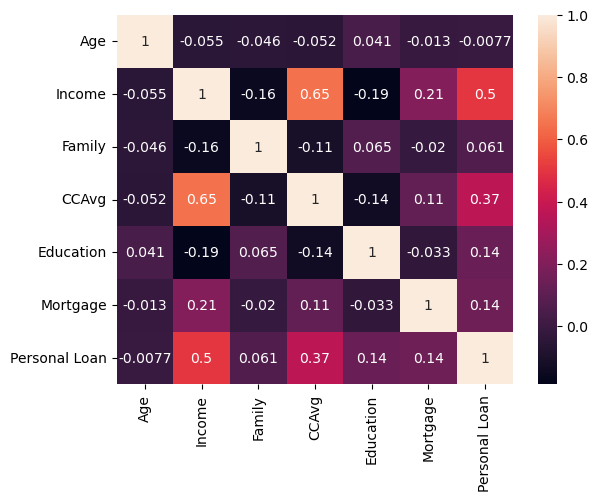

In [229]:
#  correlacion entre variables
sns.heatmap(df.corr(), annot=True)

In [230]:
# las variables que mas se correlacionan con la variable dependiente son
# Income, CCAvg y Education, lo que indica que son las variables mas relevantes para el modelo

In [231]:
# get dummies
df = pd.get_dummies(df, columns=['Education'])
df.head()

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Education_1,Education_2,Education_3
ID,,,,,,,,,
1,25,49,4,1.6,0,0,1,0,0
2,45,34,3,1.5,0,0,1,0,0
3,39,11,1,1.0,0,0,1,0,0
4,35,100,1,2.7,0,0,0,1,0
5,35,45,4,1.0,0,0,0,1,0


In [245]:
# c) Defina en un objeto X las variables predictoras y en Y la variable respuesta 
# Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción 
# 5:1. Recuerde que la función train_test_split() es útil para realizar split simple, 
# además fije una semilla 2021 (random_state=2021 en la función 
# train_test_split()).

# definir las variables predictoras y la variable a predecir
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)


In [246]:
# d) Obtenga un árbol de decisión con el set de datos de entrenamiento. 
# Obtenga el MSE del modelo en el set de prueba. Muestre el árbol obtenido, 
# ¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué 
# alternativas pudieran probarse para abordar este problema?

# modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)


DecisionTreeClassifier()

In [247]:
# MSE del modelo en el set de prueba
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del árbol de decisión:", mse)


MSE del árbol de decisión: 0.013


In [248]:
# acuraccy
accuracy_score(y_test, y_pred)

0.987

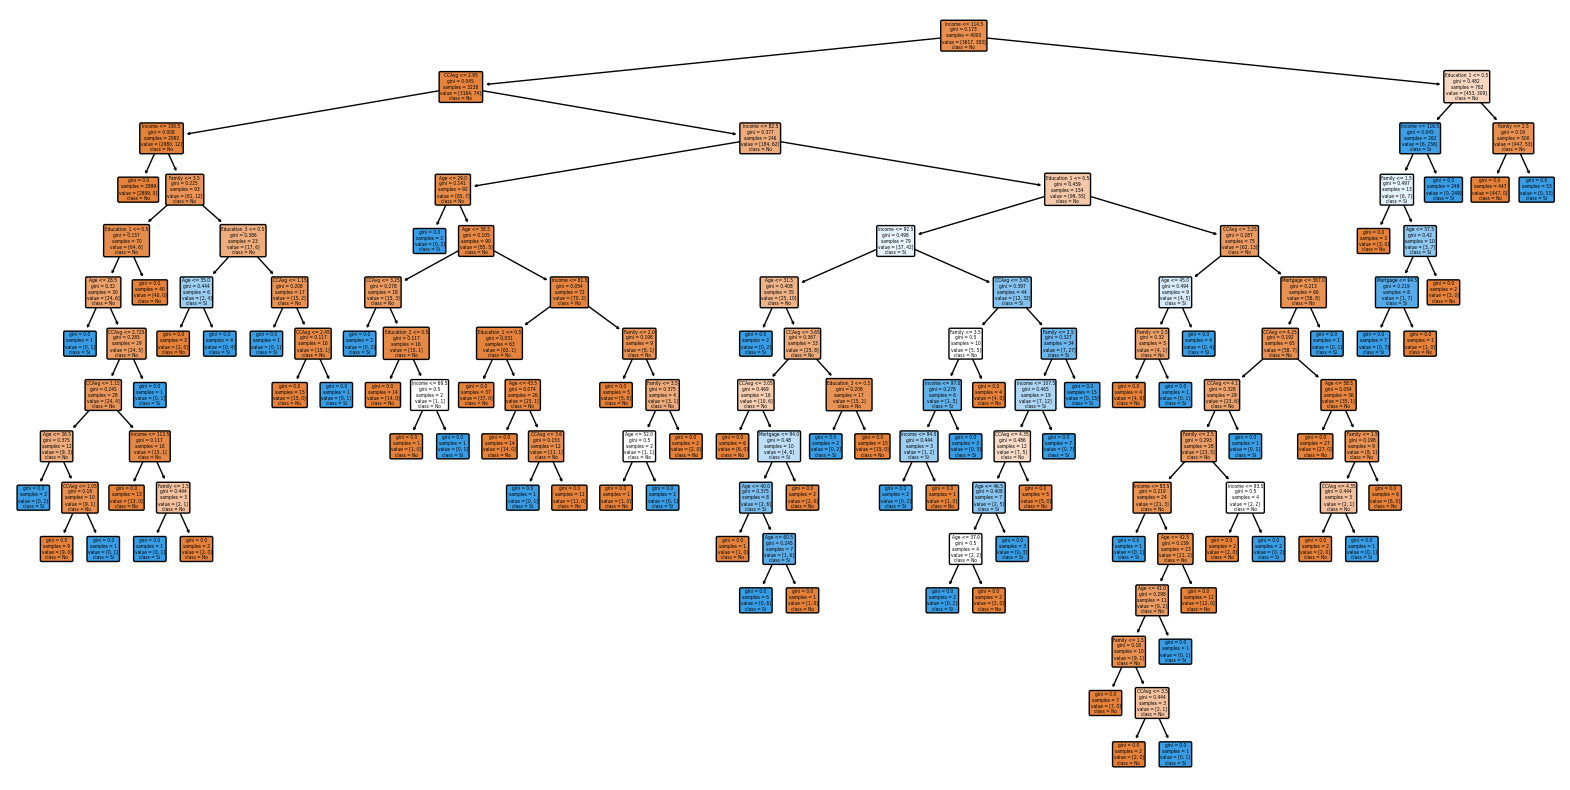

In [249]:
# Mostramos el arbol obtenido
plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=X.columns) 
plt.show()


# observaciones:
# se observa que el arbol es muy grande y dificil de entender, esto se debe a que el modelo puede estar sobreajustado
# no es un buen modelo para predecir la variable dependiente.

# alternativas:
# se puede probar con otro modelo de arbol de decision, como por ejemplo el random forest
# se puede probar con otro modelo de clasificacion, como por ejemplo el gradient boosting


In [250]:
# e) Plantee otro árbol de decisión pero definiendo como parámetro de control 
# o prepoda la profundidad máxima del árbol, para esto en la función 
# DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad 
# máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo 
# anterior. Observe el árbol obtenido. Comente.

# modelo de poda
new_modelo = DecisionTreeClassifier(max_depth=2)
new_modelo.fit(X_train, y_train)


# MSE del modelo en el set de prueba
y_pred = new_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del árbol de decisión:", mse)


MSE del árbol de decisión: 0.031


In [255]:
# acuraccy
accuracy_score(y_test, y_pred)

0.969

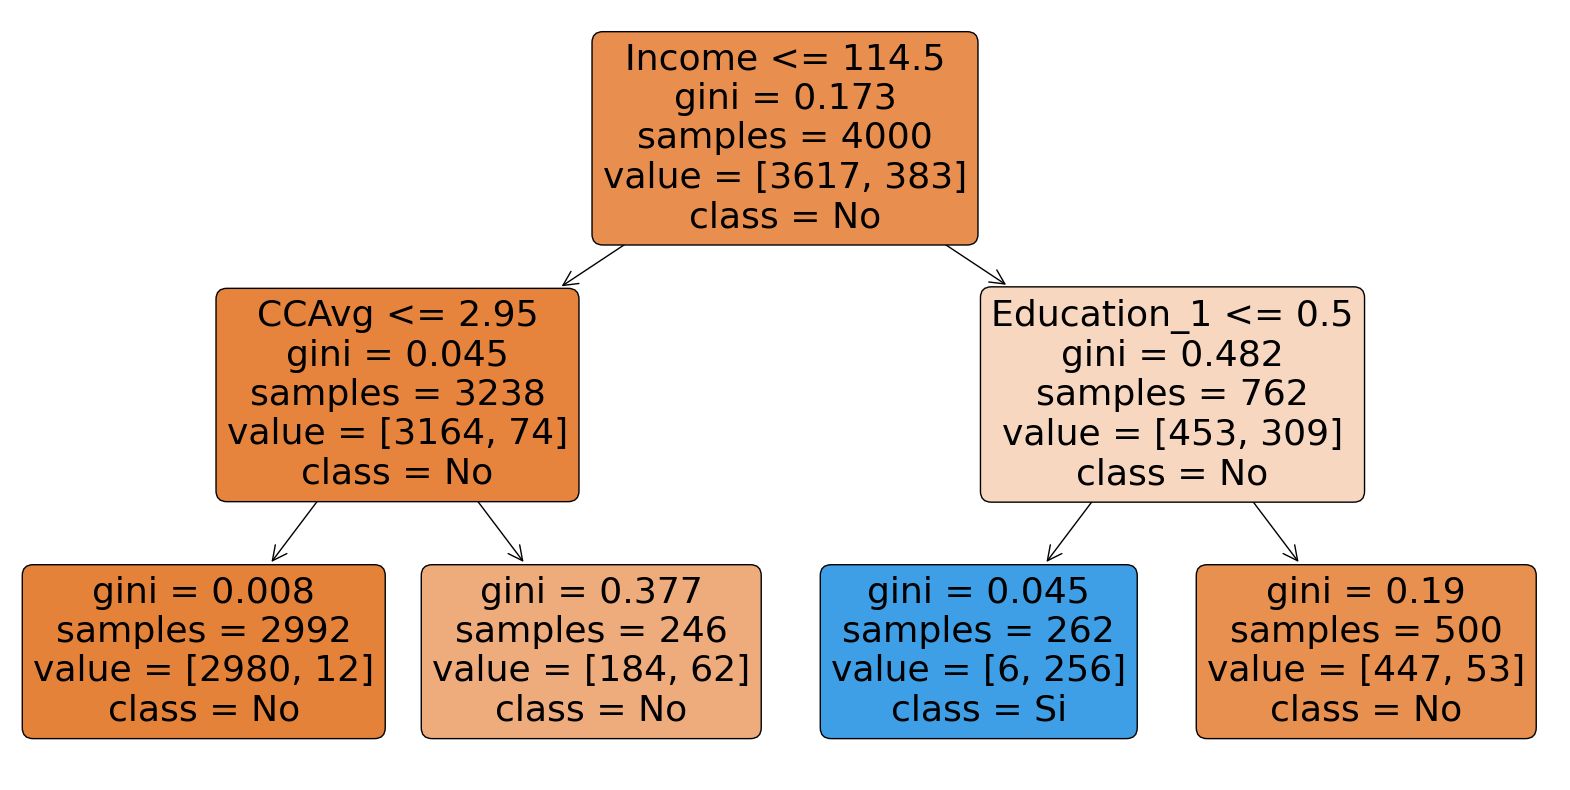

In [256]:
# Mostramos el arbol obtenido
plt.figure(figsize=(20, 10))
plot_tree(new_modelo, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=X.columns)
plt.show()

# observaciones:
# se observa que el arbol es mas pequeño y mas facil de entender al tener solo dos nuiveles de profundidad, 
# con esto se evita el sobreajuste del modelo ya que el arbol no crece tanto.

# El MSE es un poco más alto lo que indica que el modelo anterior es mejor, 
# pero hay que considerra que el modelo anterior puede estar sobreajustado.


In [261]:
# f) Busque los mejores valores de los criterios de corte y máxima profundidad 
# para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint: 
# evalue los hiperparámetros criterion y max_depth)

# Definimos los valores de los hiperparametros
criterion = ['gini', 'entropy'] # Criterio de corte
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10] # Profundidad maxima del arbol


# Definimos el diccionario de los hiperparametros
hiperparametros = dict(criterion=criterion, max_depth=max_depth)

# Definimos la grilla
grid = GridSearchCV(tree, hiperparametros, cv=10, scoring='accuracy') # 10 validaciones cruzadas

# Ajustamos la grilla
grid.fit(X_train, y_train)

# Obtenemos los mejores hiperparametros
print('Mejores hiperparametros:', grid.best_params_)
print()

# Obtenemos el MSE del modelo en el set de prueba
Y_pred = grid.predict(X_test)
print('MSE del modelo en el set de prueba:', np.mean((y_test - y_pred)**2))
print()

# Obtenemos el accuracy del modelo en el set de prueba
print('Accuracy del modelo en el set de prueba:', accuracy_score(y_test, y_pred))
print()


Mejores hiperparametros: {'criterion': 'gini', 'max_depth': 8}

MSE del modelo en el set de prueba: 0.031

Accuracy del modelo en el set de prueba: 0.969

